

Raster Data Analysis using Python Libraries
============================================

## Objective
To explore the following libraries
- GDAL pip install gdal
- Matplotlib
- Numpy

### What is GDAL?
<b>GDAL - Geospatial Data Abstraction Library</b><br>
Library with useful functions to read raster data.
Some useful funtions are:
- `Open`
- `GetDriver`
- `GetRasterBand`
- `GetGeoTransform`
- `GetProjection`
- `GetSubDatasets`
- `Merge`
- `Warp`


### What is Matplotlib?
- Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. 

- Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

- <a href='https://matplotlib.org/tutorials/introductory/sample_plots.html'>Examples</a>

### What is Numpy? 
NumPy is the fundamental package for scientific computing with Python:
- A powerful N-dimensional array object
- Tools for integrating C/C++ and Fortran code
- Useful linear algebra, Fourier transform, and random number capabilities
- <a href='http://cs231n.github.io/python-numpy-tutorial/'>Detailed tutorials</a>

### Import module

In [1]:
# Import the Python 3 print function
# from __future__ import print_function

# Import the "gdal" submodule from within the "osgeo" module
from osgeo import gdal

# We can check which version we're running by printing the "__version__" variable
print("GDAL's version is: " + gdal.__version__)
print(gdal)

GDAL's version is: 2.3.3
<module 'osgeo.gdal' from '/home/nilay/anaconda3/lib/python3.7/site-packages/osgeo/gdal.py'>



### Examples
#### Open an image

In [3]:
# Open a GDAL dataset
dataset = gdal.Open('example/LE70220491999322EDC01_stack.gtif')

print(dataset)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f4b94f8ac30> >


## Layer Stacking
Here we will utilize GDAL merge method to stack the layers. In this case the gdal is utilised for managing python libraries

## Mosaic Satellite Images
Here we will utilize GDAL merge method to stack the layers. In this case the gdal is utilised for managing python libraries


#### Get Image attributes

In [4]:
xSize= dataset.RasterXSize
print(xSize)
projection= dataset.GetProjection()
print(projection)

250
PROJCS["WGS 84 / UTM zone 15N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-93],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32615"]]


### Read Image raster bands


In [5]:
# Open the blue band in our image
blue = dataset.GetRasterBand(1)

print(blue)

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f4b74386bd0> >


### Raster Stats

In [6]:
band_min, band_max, band_mean, band_stddev = blue.GetStatistics(0, 1)
print('band max:'+str(band_max))
print('band min:'+str(band_min))
print('band mean:'+str(band_mean))
print('band SD:'+str(band_stddev))

band max:1810.0
band min:198.0
band mean:439.015984
band SD:139.7168287663


In [7]:
band_max, band_min, band_mean, band_stddev = blue.GetStatistics(0, 1)
print('Band range: {minimum} - {maximum}'.format(maximum=band_max,
                                                 minimum=band_min))
print('Band mean, stddev: {m}, {s}\n'.format(m=band_mean, s=band_stddev))


Band range: 1810.0 - 198.0
Band mean, stddev: 439.015984, 139.7168287663



### From GDAL to Numpy

In [18]:
# No alias
import numpy
# Alias or rename to "np" -- a very common practice
import numpy as np

In order to read our band into one of these wonderful `np.array` objects, we will use the `ReadAsArray` method :

### Read in the entire image:

In [9]:
data = dataset.ReadAsArray()

print(data.shape)


(8, 250, 250)


Let's say we want to read all of our bands into one 3 dimensional (nrow x ncol x nband) dataset. We will begin by initializing a 3 dimensional array. Next, we will loop over all bands in our raster image dataset and read them into our newly allocated 3 dimensional array:

In [12]:
# Initialize a 3d array -- use the size properties of our image for portability!
image = np.zeros((250, 250, 8))

# Loop over all bands in dataset
for b in range(dataset.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = dataset.GetRasterBand(b + 1)
    
    # Read in the band's data into the third dimension of our array
    image[:, :, b] = band.ReadAsArray()

print(image.shape)
print(image.dtype)

(250, 250, 8)
float64


## Calclulate NDVI

In [ ]:

ndvi = (image[:, :, 2] - image[:, :, 3]) / (image[:, :, 2] + image[:, :, 3])

print(ndvi)
print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))

# Visualise data

### 2 D Plotting

In [13]:
print('Array shape before: {shp} (size is {sz})'.format(shp=image[:, :, 3].shape, sz=image[:, :, 3].size))

red = np.ndarray.flatten(image[:, :, 2])
nir = np.ndarray.flatten(image[:, :, 3])

print(nir.shape)

Array shape before: (250, 250) (size is 62500)
(62500,)


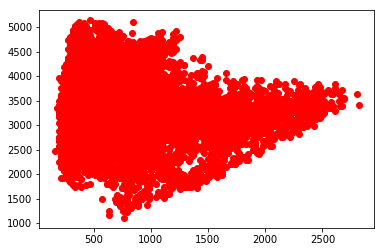

In [15]:
import matplotlib.pyplot as plt
plt.scatter(red,nir,color='r', marker='o')
plt.show()

0.09470304975922954


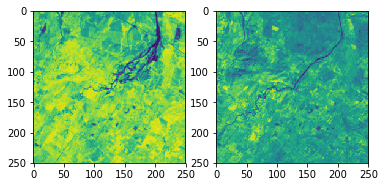

In [16]:
red_ndvi=image[:,:,2]
nir_ndvi=image[:,:,3]
ndvi = (nir_ndvi-red_ndvi)/(nir_ndvi+red_ndvi)
print(ndvi.min())
plt.subplot(121)
plt.imshow(ndvi)
plt.subplot(122)
plt.imshow(image[:,:,3])


### Display Single band data

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Extract reference to SWIR1, NIR, and Red bands
colors = image[:, :, 3].astype(np.float64)


plt.imshow(colors)
plt.colorbar()

### Display Multi band data

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Extract reference to SWIR1, NIR, and Red bands
index = np.array([3, 2, 1])
colors = image[:, :, index].astype(np.float64)

max_val = 8000
min_val = 0

# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[2]):
    colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)

plt.subplot(121)
plt.imshow(colors)

## Write GeoTiff

In [ ]:
# create the output image
driver = dataset.GetDriver()
#print driver
outDs = driver.Create("example/out.gtif", 250, 250, 1, gdal.GDT_Float32)
outBand = outDs.GetRasterBand(1)
#outData = numpy.zeros(colors)

# write the data
outBand.WriteArray(ndvi)

# georeference the image and set the projection
outDs.SetGeoTransform(dataset.GetGeoTransform())
outDs.SetProjection(dataset.GetProjection())

del outDs